In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('/content/pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2025-04-09 16:27:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 173.194.217.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   160MB/s    in 0.7s    

2025-04-09 16:27:41 (160 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.


In [6]:
for i in os.walk('pizza_steak'):
  print(i)

('pizza_steak', ['test', 'train'], [])
('pizza_steak/test', ['pizza', 'steak'], [])
('pizza_steak/test/pizza', [], ['1202689.jpg', '556507.jpg', '2165223.jpg', '3724416.jpg', '849291.jpg', '3724187.jpg', '324942.jpg', '2582289.jpg', '144631.jpg', '1001116.jpg', '1445608.jpg', '723745.jpg', '3581181.jpg', '2157510.jpg', '212995.jpg', '11297.jpg', '153195.jpg', '1949644.jpg', '40449.jpg', '99604.jpg', '833711.jpg', '2478048.jpg', '373847.jpg', '65128.jpg', '2605853.jpg', '3456604.jpg', '420409.jpg', '3754474.jpg', '648055.jpg', '2161321.jpg', '3586083.jpg', '2997525.jpg', '3728155.jpg', '1765727.jpg', '1484836.jpg', '2782998.jpg', '2631321.jpg', '419962.jpg', '998005.jpg', '242976.jpg', '3827990.jpg', '121960.jpg', '1962101.jpg', '1843754.jpg', '2549661.jpg', '44810.jpg', '540882.jpg', '2250611.jpg', '1180001.jpg', '565112.jpg', '1380247.jpg', '1655630.jpg', '321526.jpg', '729262.jpg', '1925494.jpg', '1180273.jpg', '3650727.jpg', '3282393.jpg', '129666.jpg', '2619955.jpg', '2517724.jpg',

In [7]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [8]:
os.listdir('pizza_steak/train')

['pizza', 'steak']

In [9]:
import pathlib
data_dir = pathlib.Path('pizza_steak/train')
data_dir

PosixPath('pizza_steak/train')

In [10]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [11]:
import matplotlib.image as mpimg
import random

In [12]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class # pizza_steak/test/pizza
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (512, 512, 3)


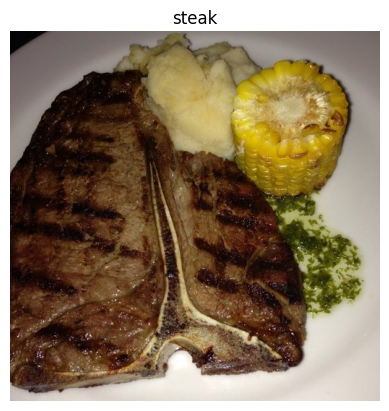

In [13]:
img = view_random_image(target_dir='pizza_steak/train/', target_class='steak')

In [14]:
img/255

array([[[0.01176471, 0.01176471, 0.01960784],
        [0.01176471, 0.01176471, 0.01960784],
        [0.01568627, 0.01568627, 0.02352941],
        ...,
        [0.42745098, 0.38431373, 0.37647059],
        [0.42352941, 0.38039216, 0.37254902],
        [0.42352941, 0.38039216, 0.37254902]],

       [[0.00784314, 0.00784314, 0.01568627],
        [0.01176471, 0.01176471, 0.01960784],
        [0.01568627, 0.01568627, 0.02352941],
        ...,
        [0.42745098, 0.38431373, 0.37647059],
        [0.42745098, 0.38431373, 0.37647059],
        [0.42745098, 0.38431373, 0.37647059]],

       [[0.01176471, 0.01176471, 0.01960784],
        [0.01176471, 0.01176471, 0.01960784],
        [0.01568627, 0.01568627, 0.02352941],
        ...,
        [0.43137255, 0.38823529, 0.38039216],
        [0.43137255, 0.38823529, 0.38039216],
        [0.42745098, 0.38431373, 0.37647059]],

       ...,

       [[0.76470588, 0.72941176, 0.70980392],
        [0.76470588, 0.72941176, 0.70980392],
        [0.76862745, 0

# Fitting the Model

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = '/content/pizza_steak/train'
valid_dir = '/content/pizza_steak/test'

In [16]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # all pictures shoild be 224*224 pixels
                                               class_mode='binary',
                                               seed=42)

valid_data = train_datagen.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [18]:
history = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.5388 - loss: 0.9577 - val_accuracy: 0.7460 - val_loss: 0.5644
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.7252 - loss: 0.5606 - val_accuracy: 0.8300 - val_loss: 0.4189
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.8014 - loss: 0.4402 - val_accuracy: 0.8360 - val_loss: 0.3668
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8401 - loss: 0.3904 - val_accuracy: 0.8520 - val_loss: 0.3617
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8325 - loss: 0.3946 - val_accuracy: 0.8600 - val_loss: 0.3266


In [19]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [20]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.4879 - loss: 1.4945 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.4869 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.4903 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.5033 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.4961 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [22]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_3.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [23]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 413ms/step - accuracy: 0.5821 - loss: 12.1595 - val_accuracy: 0.7820 - val_loss: 0.7054
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 388ms/step - accuracy: 0.6967 - loss: 0.9257 - val_accuracy: 0.6620 - val_loss: 0.8558
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 403ms/step - accuracy: 0.6508 - loss: 1.4772 - val_accuracy: 0.7180 - val_loss: 0.5539
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 368ms/step - accuracy: 0.6950 - loss: 0.9453 - val_accuracy: 0.7780 - val_loss: 0.4690
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 394ms/step - accuracy: 0.7459 - loss: 0.5989 - val_accuracy: 0.7760 - val_loss: 0.4288


In [24]:
len(train_data)

47

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


array([[[ 26,  32,  54],
        [ 24,  31,  50],
        [ 19,  24,  44],
        ...,
        [ 21,  27,  61],
        [ 20,  26,  60],
        [ 18,  24,  58]],

       [[ 25,  31,  53],
        [ 25,  32,  51],
        [ 22,  27,  47],
        ...,
        [ 22,  28,  62],
        [ 21,  27,  61],
        [ 21,  27,  61]],

       [[ 24,  30,  52],
        [ 25,  32,  51],
        [ 25,  30,  50],
        ...,
        [ 23,  29,  63],
        [ 23,  29,  63],
        [ 23,  29,  63]],

       ...,

       [[ 33,  30,  41],
        [ 34,  31,  42],
        [ 35,  32,  43],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       [[ 34,  31,  42],
        [ 34,  31,  42],
        [ 34,  31,  42],
        ...,
        [253, 254, 255],
        [253, 254, 255],
        [253, 254, 255]],

       [[ 36,  33,  44],
        [ 35,  32,  43],
        [ 34,  31,  42],
        ...,
        [253, 254, 255],
        [253, 254, 255],
        [253, 254, 255]]], dtype=uint8)
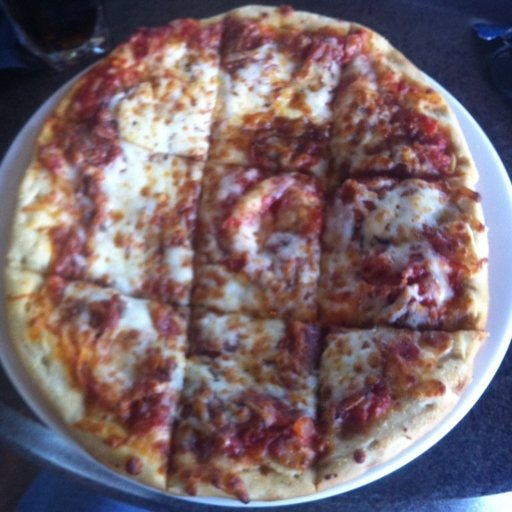

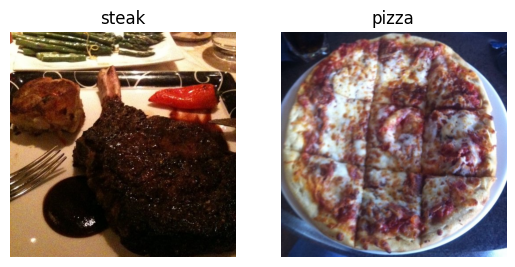

In [25]:
plt.figure()
plt.subplot(1, 2, 1)
view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
view_random_image('pizza_steak/train/',  'pizza')

In [26]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary')

test_data = test_datagen.flow_from_directory(directory=valid_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
images, labels = next(train_data)

In [29]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPool2D
from tensorflow.keras import Sequential

In [30]:
tf.keras.backend.clear_session()

In [31]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [32]:
optimizer=Adam(learning_rate=1e-3)
model_4.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [33]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 265ms/step - accuracy: 0.5581 - loss: 0.6824 - val_accuracy: 0.6000 - val_loss: 0.6504
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 260ms/step - accuracy: 0.6369 - loss: 0.6365 - val_accuracy: 0.7560 - val_loss: 0.5420
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 256ms/step - accuracy: 0.7158 - loss: 0.5572 - val_accuracy: 0.8160 - val_loss: 0.4074
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 300ms/step - accuracy: 0.7968 - loss: 0.4571 - val_accuracy: 0.8540 - val_loss: 0.3727
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 253ms/step - accuracy: 0.8315 - loss: 0.3859 - val_accuracy: 0.8520 - val_loss: 0.3513


In [34]:
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 616ms/step - accuracy: 0.8737 - loss: 0.3313


[0.3266488313674927, 0.8600000143051147]

In [35]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.8257 - loss: 0.3653


[0.3513220250606537, 0.8519999980926514]

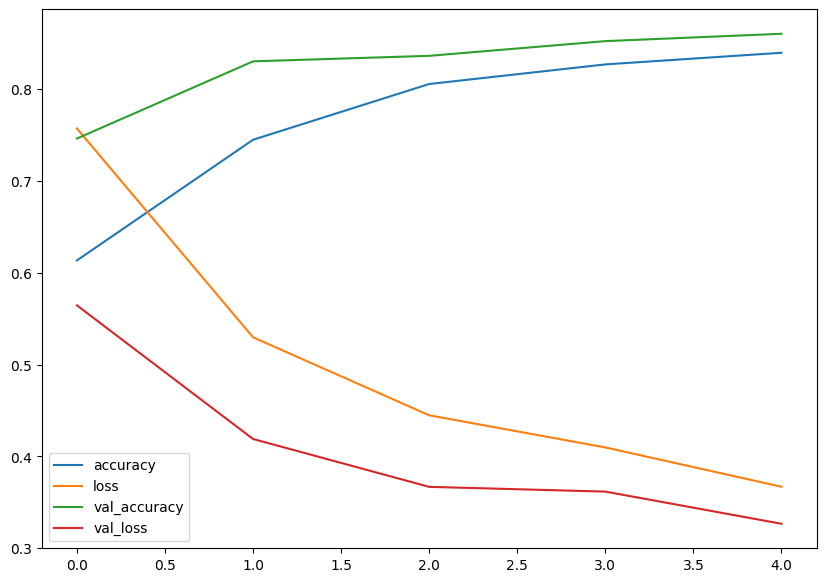

In [36]:
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [37]:
history_4.history

{'accuracy': [0.593999981880188,
  0.6653333306312561,
  0.7546666860580444,
  0.7906666398048401,
  0.8100000023841858],
 'loss': [0.6696430444717407,
  0.6145540475845337,
  0.5111619830131531,
  0.4696030616760254,
  0.41376742720603943],
 'val_accuracy': [0.6000000238418579,
  0.7559999823570251,
  0.8159999847412109,
  0.8539999723434448,
  0.8519999980926514],
 'val_loss': [0.6503769755363464,
  0.5419548153877258,
  0.40737712383270264,
  0.3726702928543091,
  0.3513220548629761]}

In [38]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

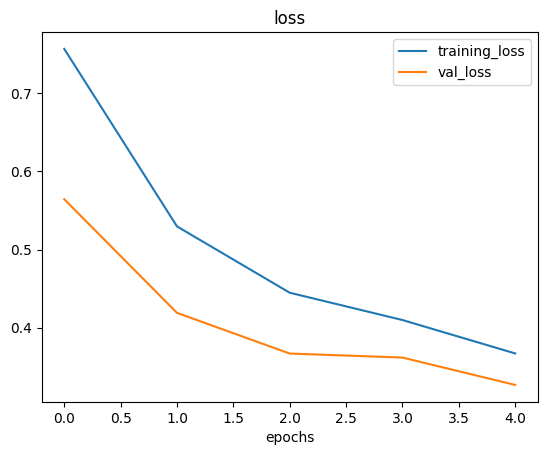

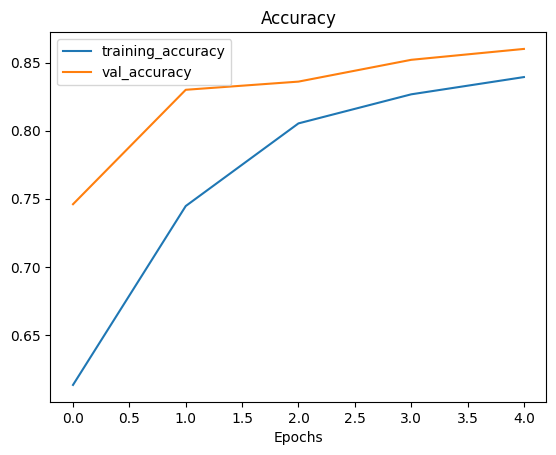

In [39]:
import matplotlib.pyplot as plt

plot_loss_curves(history);

# Data Augmentation

In [40]:
# Augmented Dataset
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,
                                             vertical_flip=True)
# Normal Dataset
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [41]:
print('Train data augmented: ')
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   batch_size=32,
                                                                   target_size=(224,224),
                                                                   class_mode='binary',
                                                                   shuffle=False)
print('Non-Augmented data: ')
train_data = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   batch_size=32,
                                                                   target_size=(224,224),
                                                                   class_mode='binary',
                                                                   shuffle=False)

IMG_SIZE=(224,224)
print('Non-Augmented test data:')
test_data = test_datagen.flow_from_directory(directory=valid_dir,
                                             batch_size=32,
                                             target_size=IMG_SIZE,
                                             class_mode='binary')

Train data augmented: 
Found 1500 images belonging to 2 classes.
Non-Augmented data: 
Found 1500 images belonging to 2 classes.
Non-Augmented test data:
Found 500 images belonging to 2 classes.


In [42]:
images, labels = next(train_data)

augmented_images, augmented_labels = next(train_data_augmented)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

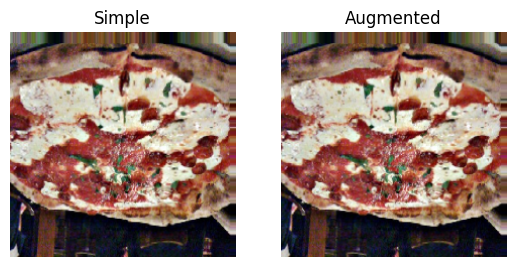

In [43]:
plt.figure()
random_number = np.random.randint(len(augmented_images))

plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title('Simple')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(images[random_number])
plt.title('Augmented')
plt.axis('off')

In [44]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_5.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [46]:
history_5 = model_5.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.5633 - loss: 4.1257 - val_accuracy: 0.6200 - val_loss: 0.6421
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5574 - loss: 0.6976 - val_accuracy: 0.6480 - val_loss: 0.6179
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6133 - loss: 0.6652 - val_accuracy: 0.5320 - val_loss: 0.6673
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.5949 - loss: 0.6654 - val_accuracy: 0.5220 - val_loss: 0.6702
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.3987 - loss: 0.7719 - val_accuracy: 0.5060 - val_loss: 0.6857


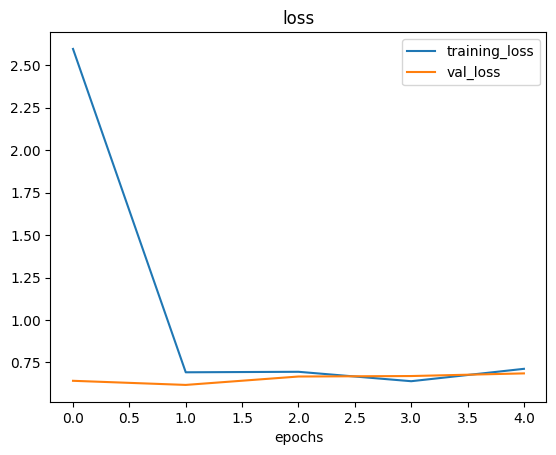

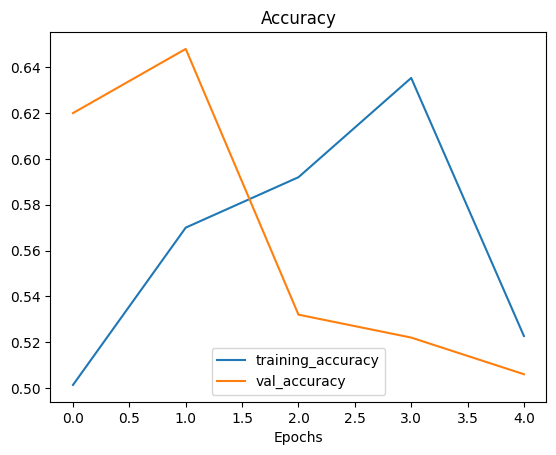

In [47]:
plot_loss_curves(history_5)

In [48]:
# Now let's shuffle data

In [49]:
print('Augmented and Shuffled train data:')
train_data_augmented_and_shuffled = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                                batch_size=32,
                                                                                target_size=IMG_SIZE,
                                                                                class_mode='binary',
                                                                                shuffle=True)

Augmented and Shuffled train data:
Found 1500 images belonging to 2 classes.


In [50]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=(3, 3),
                            padding='valid',
                            kernel_initializer='he_normal',
                            activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [51]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_6.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [52]:
history_6 = model_6.fit(train_data_augmented_and_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_and_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.5714 - loss: 0.6852 - val_accuracy: 0.7600 - val_loss: 0.5082
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7000 - loss: 0.5818 - val_accuracy: 0.8180 - val_loss: 0.4244
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.7437 - loss: 0.5324 - val_accuracy: 0.8380 - val_loss: 0.3905
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7734 - loss: 0.4757 - val_accuracy: 0.8500 - val_loss: 0.3739
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7840 - loss: 0.4755 - val_accuracy: 0.8520 - val_loss: 0.3516


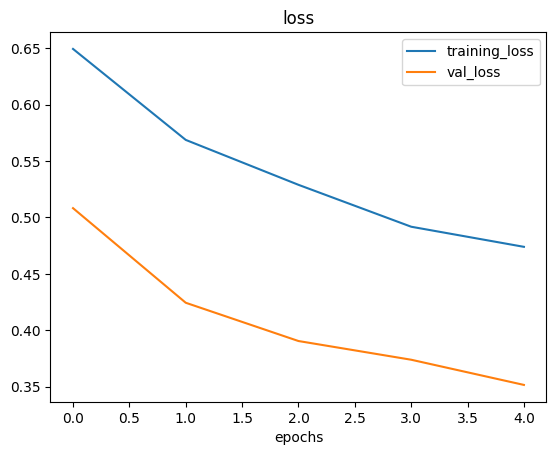

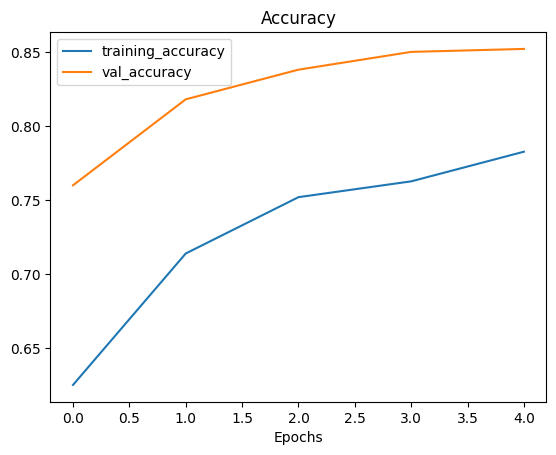

In [53]:
plot_loss_curves(history_6)

In [54]:
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak=mpimg.imread('03-steak.jpeg')

--2025-04-09 16:57:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2025-04-09 16:57:54 (28.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



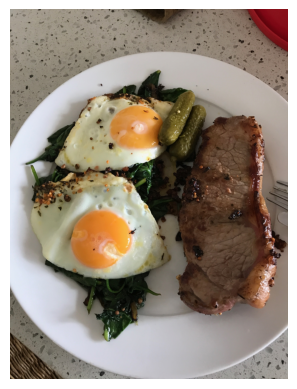

In [55]:
plt.imshow(steak)
plt.axis(False)
plt.show()

In [56]:
steak_norm = ImageDataGenerator(rescale=1/255.)

In [57]:
steak.shape

(4032, 3024, 3)

In [58]:
def load_and_prep_image(filename, img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255.
  return img

In [59]:
(load_and_prep_image('/content/03-steak.jpeg').shape)

TensorShape([224, 224, 3])

In [60]:
steak = load_and_prep_image('03-steak.jpeg')
pred = model_6.predict(tf.expand_dims(steak, axis=0)).round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [61]:
pred

array([[1.]], dtype=float32)

In [62]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [63]:
pred_class = class_names[int(tf.round(pred))]
pred_class

np.str_('steak')

In [64]:
def pred_and_plot(model, filename, class_names=class_names):
  img=load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[np.argmax(tf.round(pred))]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


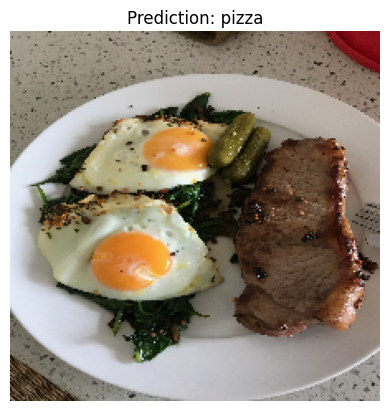

In [65]:
pred_and_plot(model_6, '03-steak.jpeg')

In [66]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza=mpimg.imread('03-pizza-dad.jpeg')

--2025-04-09 16:57:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2025-04-09 16:57:56 (36.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


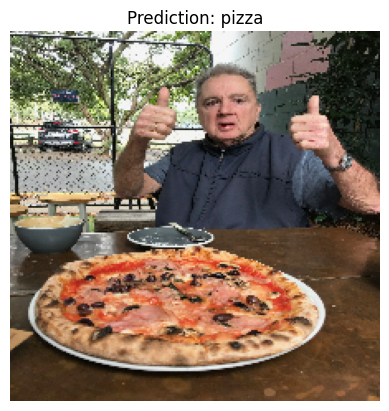

In [67]:
pred_and_plot(model_6, '/content/03-pizza-dad.jpeg')

# Top 10 Food Classes

In [68]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

import os
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

--2025-04-09 16:57:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.207, 173.194.216.207, 173.194.217.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  92.0MB/s    in 5.1s    

2025-04-09 16:58:02 (96.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories and 250 images in 10_food_classes_all_data/test/

In [69]:
train_dir = '/content/10_food_classes_all_data/train/'
test_dir = '/content/10_food_classes_all_data/test/'

In [70]:
train_data_augmentation = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True,
                                             vertical_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [71]:
IMG_SIZE=(224,224)
batch_size=32

In [72]:
augmented_train = train_data_augmentation.flow_from_directory(directory=train_dir,
                                                                 target_size=IMG_SIZE,
                                                                 class_mode='categorical',
                                                                 batch_size=batch_size)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=IMG_SIZE,
                                             class_mode='categorical',
                                             batch_size=batch_size)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [73]:
images, labels = next(augmented_train)

In [74]:
images.shape

(32, 224, 224, 3)

In [75]:
labels.shape

(32, 10)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

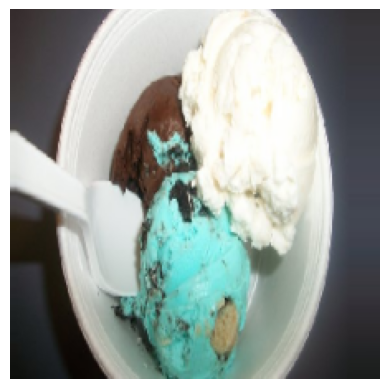

In [76]:
plt.imshow(images[np.random.randint(len(images))])
plt.axis(False)

In [77]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=(3, 3),
                            padding='valid',
                            kernel_initializer='he_normal',
                            activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [78]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_7.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [79]:
images.shape

(32, 224, 224, 3)

In [80]:
tf.expand_dims(labels, axis=0)

<tf.Tensor: shape=(1, 32, 10), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.

In [81]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('MyCheckpoint.weights.h5',
                                                   save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

In [82]:
history_7 = model_7.fit(augmented_train,
                        epochs=5,
                        steps_per_epoch=len(augmented_train),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=(checkpoint_cb,early_stopping_cb))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 291s 1s/step - accuracy: 0.1401 - loss: 2.4332 - val_accuracy: 0.2348 - val_loss: 2.0656
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.2294 - loss: 2.1251 - val_accuracy: 0.2824 - val_loss: 1.9888
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.2703 - loss: 2.0491 - val_accuracy: 0.3332 - val_loss: 1.9003
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.3041 - loss: 1.9925 - val_accuracy: 0.3704 - val_loss: 1.8528
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.3252 - loss: 1.9552 - val_accuracy: 0.3628 - val_loss: 1.8699


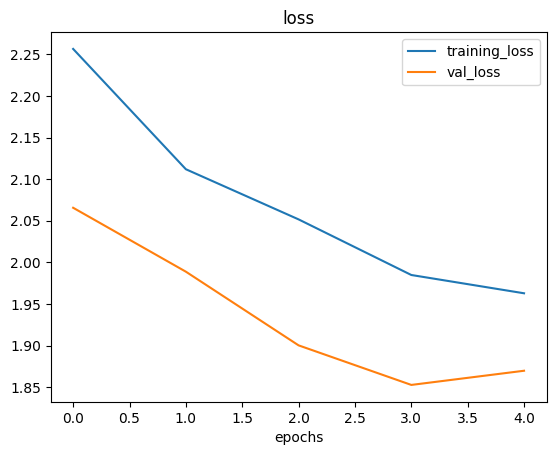

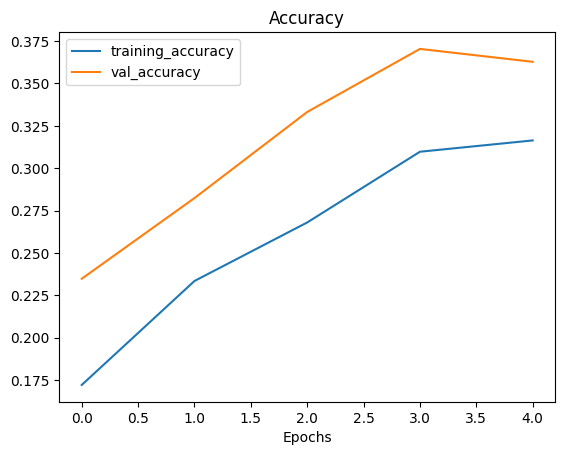

In [83]:
plot_loss_curves(history_7)

In [84]:
!wget https://thekittchen.com/wo-content/uploads/2016/04/PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg

--2025-04-09 17:21:55--  https://thekittchen.com/wo-content/uploads/2016/04/PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg
Resolving thekittchen.com (thekittchen.com)... 104.18.37.69, 172.64.150.187, 2606:4700:4400::ac40:96bb, ...
Connecting to thekittchen.com (thekittchen.com)|104.18.37.69|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-09 17:21:55 ERROR 404: Not Found.



In [94]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model_7.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[np.argmax(tf.round(pred))]
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

In [96]:
#pred_and_plot(model_7, '/content/PRE-Brand-Steak-and-Blue-Cheese-Pizza-2.jpg')

# Another Version of 10 Food classes

In [97]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (512, 512, 3)


array([[[ 4,  3,  0],
        [ 5,  4,  0],
        [ 5,  4,  0],
        ...,
        [63, 65, 43],
        [69, 71, 49],
        [76, 78, 56]],

       [[ 4,  3,  0],
        [ 5,  4,  0],
        [ 5,  4,  0],
        ...,
        [66, 68, 46],
        [73, 75, 53],
        [79, 81, 59]],

       [[ 4,  3,  0],
        [ 5,  4,  0],
        [ 5,  4,  0],
        ...,
        [70, 72, 50],
        [76, 78, 57],
        [82, 84, 63]],

       ...,

       [[31, 30, 28],
        [32, 31, 29],
        [33, 32, 30],
        ...,
        [14, 13, 11],
        [14, 13, 11],
        [14, 13, 11]],

       [[29, 29, 27],
        [30, 30, 28],
        [32, 32, 30],
        ...,
        [13, 13, 11],
        [13, 13, 11],
        [13, 13, 11]],

       [[29, 29, 27],
        [30, 30, 28],
        [32, 32, 30],
        ...,
        [13, 13, 11],
        [13, 13, 11],
        [13, 13, 11]]], dtype=uint8)
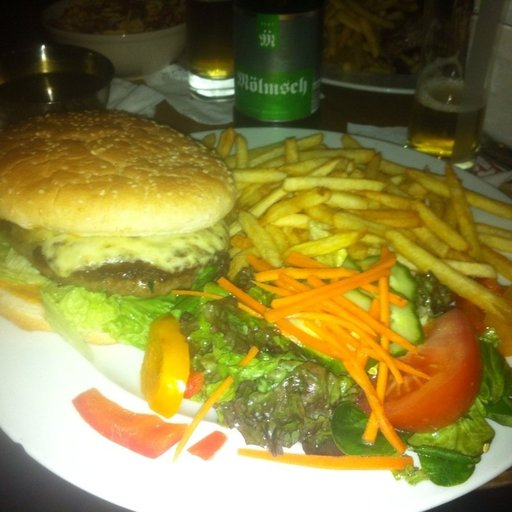

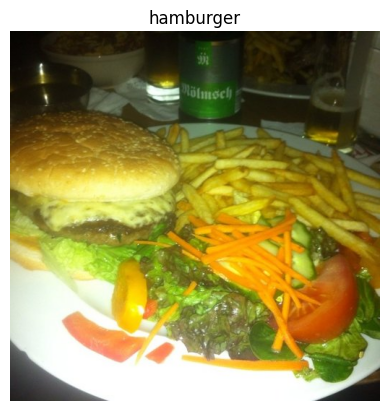

In [98]:
view_random_image(target_dir = train_dir, target_class=random.choice(class_names))

In [99]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = test_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [102]:
model_1_categorical = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           input_shape=(224, 224, 3),
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1_categorical.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])

In [104]:
history_1_categorical = model_1_categorical.fit(train_data,
                                                epochs=5,
                                                steps_per_epoch=len(train_data),
                                                validation_data=test_data,
                                                validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 486s 2s/step - accuracy: 0.1306 - loss: 2.2885 - val_accuracy: 0.2448 - val_loss: 2.0777
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 458s 2s/step - accuracy: 0.3515 - loss: 1.8757 - val_accuracy: 0.2836 - val_loss: 2.0233
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 472s 2s/step - accuracy: 0.6013 - loss: 1.2361 - val_accuracy: 0.2964 - val_loss: 2.2851
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 482s 2s/step - accuracy: 0.8335 - loss: 0.5630 - val_accuracy: 0.2668 - val_loss: 3.0766
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 467s 2s/step - accuracy: 0.9415 - loss: 0.2218 - val_accuracy: 0.2596 - val_loss: 4.3152


In [105]:
ckp = ModelCheckpoint('MyCheckpoint.weights.h5', save_weights_only=True)
es = EarlyStoping(restore_best_weights=True,
                  patience=1,
                  monitor='loss',
                  #mode='min'
                  )

NameError: name 'ModelCheckpoint' is not defined

In [ ]:
history_1_categorical = model_1_categorical.fit(train_data,
                                                epochs=5,
                                                steps_per_epoch=len(train_data),
                                                validation_steps=len(test_data),
                                                callbacks=[es, ckp])

In [ ]:
history_1_categorical.history

In [ ]:
model_1_categorical = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           target_size=(224, 224),
                           padding='valid',
                           input_shape=(224, 224, 3),
                           strides=(2, 2)
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           target_size=(224, 224),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal',
                           strides=(2,2)),
    tf.keras.layers.MaxPool2D(kernel_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           target_size=(224, 224),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal',
                           strides=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           target_size=(224, 224),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal',
                           strides=(2, 2)),
    tf.keras.layers.MaxPool2D(kernel_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5)
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2_categorical.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])

In [ ]:
history_2_categorical = model_2_categorical.fit(train_data,
                                                epochs=5,
                                                steps_per_epoch=len(train_data),
                                                validation_data=test_data,
                                                validation_steps=len(test_data))

In [ ]:
model_2_categorical.evaluate(test_data)

In [ ]:
model_2_copy=tf.keras.models.clone_model(model_2_categorical)

In [ ]:
model_2_copy.summary()

In [ ]:
train_augmented_datagen = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True,
                                             vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_augmented = train_augmented_datagen.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode='categorical',
                                                                   batch_size=32)
test_data = test_datagen.flow_from_directory(train_dir,
                                             target_size=(224, 224),
                                             class_mode='categorical',
                                             batch_size=32)

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2_copy.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])

In [ ]:
history_model_2_copy = model_2_copy.fit(train_data,
                                        epochs=5,
                                        steps_per_epoch=len(train_data),
                                        validation_data=test_data,
                                        validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_model_2_copy)

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  img=load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.math.argmax(pred, axis=1)]
  else:
    pred_class = class_names[tf.int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
pred_and_plot(model=model_2_categorical,
              filename='03-hamburger.jpeg',
              class_names=(class_names))

In [ ]:
model_2_categorical.save('Categorical Model')